### Meng Wang

# MTH9875 Homework 2

Assigned: September 1, 2016.
Due: September 15, 2016 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your iPython notebook ambassador.


### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by the sum of the two corresponding normal densities:

In [1]:
d3010 <- function(x){(dnorm(x,sd=.1)+dnorm(x,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike on the x-axis.  

(d) What is implied volatility at-the-money?  Give intuition as to why.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$.  Why?

### Answer
(a)

In [3]:
## 1-year European call option
EuropeanCall<-function(k){
    ## assume S0=1, r=0
    return (0.5*BSFormula(1,exp(k),1,0,0.1)+0.5*BSFormula(1,exp(k),1,0,0.3))
}

(b)

In [4]:
## 1-year European call option implied volatility
EuropeanCallImpliedVol<-function(k){
    C<-EuropeanCall(k)
    return (BSImpliedVolCall(1, exp(k), 1, 0, C))
}

(c)

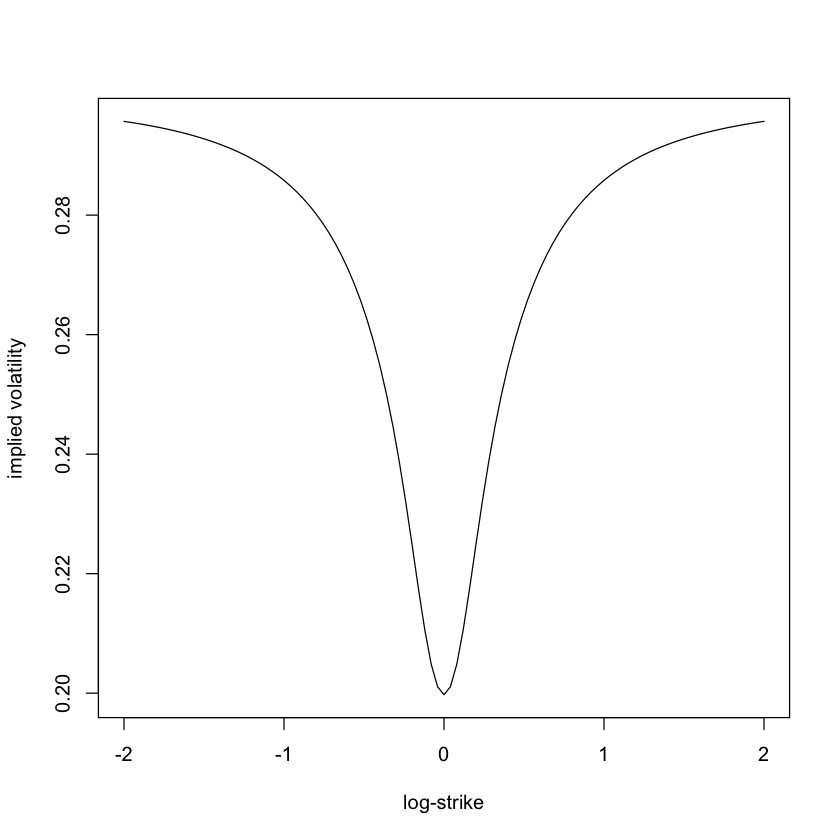

In [5]:
## 1-year volatility smile
curve(EuropeanCallImpliedVol(x),from=-2.0,to=2.0,xlab="log-strike",ylab="implied volatility")

(d)

In [6]:
## ATM implied vol
cat("ATM implied vol: ",EuropeanCallImpliedVol(0))

ATM implied vol:  0.1997502

ATM implied volatility is about 20%, which is the average of 10% and 30%. The intuition is that the price of an ATM option can be approximated as a linear function of volatility, i.e., $C_{ATM}\sim \frac{\sigma S \sqrt{T}}{\sqrt{2\pi}}$. Thus, in regime-switching model, the implied volatility is approximately the expectation of realized volatility.

(e)
<br/>When $k$ is very large, which means the call option is deep out-of-the-money, then the right tail of the return distribution contributes to the option price. Since the tails of the distribution are driven by the high volatility regime, the implied volatility tends to 30% when $k$ is very large.
<br/>When $k$ is very small, which means the put option is deep out-of-the-money (since the implied volatility of a call option is equal to that of a put option), then the left tail of the return distribution contributes to the option price. By the same reason, the implied volatility tends to 30% when $k$ is very small.

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (6 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


### Answer
Proof:
$$
f(B_t)=\left|B_t\right|\\
\frac{df(B_t)}{dB_t}=\sgn(B_t)=\theta(B_t)-\theta(-B_t)\\
\frac{d^2f(B_t)}{d{B_t}^2}=\delta(B_t)+\delta(-B_t)=2\delta(B_t)
$$
By Itô's lemma,
$$
df(B_t)=\frac{df(B_t)}{dB_t}dB_t+\frac{1}{2}\frac{d^2f(B_t)}{d{B_t}^2}dt\\
d\left|B_t\right|=\sgn(B_t)dB_t+\delta(B_t)dt
$$
By integration,
$$\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+\int_0^t\,\delta(B_s)\,ds=\int_0^t\,\sgn(B_s)\,dB_s+L_t$$
$\left|B_t\right|$ is the payoff of a straddle, which is constructed by longing a call and a put at the same strike (0) together. To delta-hedge this position, we can long the underlying asset when it is positive, and short the underlying when it goes negative.

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

### Answer
BBF formula:
<br/>For small $T$,
$$
\sigma_{BS}(k,T)\approx \frac{k}{\int_0^k\frac{dy}{\sigma(y,T)}}
$$
Differentiate on both sides,
\begin{eqnarray}
\left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}&\approx&\left.\frac{1}{\int_0^k\frac{dy}{\sigma(y,T)}}-\frac{\frac{k}{\sigma(k,T)}}{\left(\int_0^k\frac{dy}{\sigma(y,T)}\right)^2}\right|_{k=0}\\
&=&\left.\frac{\int_0^k\frac{dy}{\sigma(y,T)}-\frac{k}{\sigma(k,T)}}{\left(\int_0^k\frac{dy}{\sigma(y,T)}\right)^2}\right|_{k=0}\\
&=&\left.\frac{\frac{1}{\sigma(k,T)}-\frac{1}{\sigma(k,T)}+\frac{k}{\sigma^2(k,T)}\partial_k \sigma(k,T)}{2\int_0^k\frac{dy}{\sigma(y,T)}\frac{1}{\sigma(k,T)}}\right|_{k=0}\\
&=&\left.\frac{\frac{k}{\sigma(k,T)}\partial_k \sigma(k,T)}{2\int_0^k\frac{dy}{\sigma(y,T)}}\right|_{k=0}\\
&=&\left.\frac{\frac{1}{\sigma(k,T)}\partial_k \sigma(k,T)-\frac{k}{\sigma^2(k,T)}\left(\partial_k \sigma(k,T)\right)^2+\frac{k}{\sigma(k,T)}\frac{\partial^2 \sigma(k,T)}{\partial k^2}}{\frac{2}{\sigma(k,T)}}\right|_{k=0}\\
&=&\left.\frac{1}{2}\partial_k \sigma(k,T)\right|_{k=0}
\end{eqnarray}
The 3rd and the 5th equalities follow from L'Hopital's rule.
<br/>Thus,
$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}
$$

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_\ell(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.

### Answer
By using quadratic parameterization,
$$
\frac{\partial w}{\partial k}=\beta(T)+2\gamma(T)k
$$
$$
\frac{\partial^2 w}{\partial k^2}=2\gamma(T)
$$
Thus,
\begin{eqnarray}
&&\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }\\
&=&\left(1-\frac 12\frac{k}{w}\left(\beta(T)+2\gamma(T)k\right)\right)^2-\frac14\left(\frac14+\frac{1}{w}\right)\left(\beta(T)+2\gamma(T)k\right)^2+\gamma(T)\\
&=&\left(1-\frac 12\frac{k}{w}\left(\beta(T)+2\gamma(T)k\right)\right)^2-\frac{1}{16}\left(\beta(T)+2\gamma(T)k\right)^2-\frac{1}{4w}\left(\beta(T)+2\gamma(T)k\right)^2+\gamma(T)\\
\end{eqnarray}
When $k$ is very large, the 2nd term dominates, which makes $g(k)=\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }<0$.
<br/>From lecture notes,
\begin{eqnarray*}
\frac{\partial C}{\partial k} &=& 
\frac{\partial C_{BS}}{\partial k} + \frac{\partial C_{BS}}{\partial w}\,\frac{\partial w}{\partial k} \nonumber\\
\frac{\partial ^2 C}{\partial k^2 } &=& 
\frac{\partial^2 C_{BS} }{\partial k^2 } + 2\,\frac{\partial ^2 C_{BS} }{\partial k \partial w}\,
\frac{\partial w}{\partial k} + \frac{\partial^2 C_{BS} }{\partial w^2}\,
\left( \frac{\partial w}{\partial k} \right)^2
+ \frac{\partial C_{BS} }{\partial w}\,\frac{\partial ^2 w}{\partial k^2 } \nonumber
\end{eqnarray*}
Since $k=log(K/F_t)$,
$$\frac{\partial k}{\partial K}=\frac{1}{K}=\frac{e^{-k}}{F_t}$$
Thus,
$$\frac{\partial C}{\partial K}=\frac{\partial C}{\partial k}\frac{e^{-k}}{F_t}$$
\begin{eqnarray*}
\frac{\partial^2 C}{\partial K^2}&=&\left(\frac{\partial^2 C}{\partial k^2}-\frac{\partial C}{\partial k}\right)\frac{e^{-k}}{F_t}\\
&=&\left(-\frac{\partial C_{BS} }{\partial k} +
\frac{\partial ^2 C_{BS} }{\partial k^2 } - \frac{\partial
C_{BS} }{\partial w}\,\frac{\partial w}{\partial k} + 2\,\frac{\partial ^2 C_{BS} }{\partial k\, \partial w}\,\frac{\partial w}{\partial k} +\frac{\partial ^2 C_{BS}}{\partial w^2 }\,\left( \frac{\partial w}{\partial k} \right)^2 + \frac{\partial C_{BS}}{\partial w}\,\frac{\partial^2 w}{\partial k^2 }\right)\frac{e^{-k}}{F_t}\\
&=&2\frac{\partial C_{BS}}{\partial w}g(k)\frac{e^{-k}}{F_t}\\
&=&\frac{g(k)}{\sqrt{2\pi w}}e^{-\frac{d_2^2}{2}}<0
\end{eqnarray*}
We can construct a butterfly arbitrage based on this, i.e., long 1 unit of call options struck at $K+\delta K$ and $K-\delta K$, and short 2 units of call option struck at $K$. And you can get $2C(K)-C(K+\delta K)-C(K-\delta K)>0$ at time 0. At maturity, the payoff of the portfolio is at least 0, which is an arbitrage opportunity.